# Applying ML models on the dataset

In [ ]:
#import libraries
import warnings

def function_that_warns():
    warnings.warn("This is a warning message", UserWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    function_that_warns()  # This will not show a warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lime
import lime.lime_tabular
import shap
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Functions

In [ ]:
def draw_histograms(arr, variables, n_rows, n_cols):
    df = pd.DataFrame(arr, columns =variables)
    fig=plt.figure(figsize=(20, 20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [ ]:
# normalsie the input base on the norm parametrs, if norm is none, no normalisation will happen
def normalisation(X_train,X_test, norm ):
    if norm != None:
        scaler1 = norm
        X_train  =  scaler1.fit_transform(X_train)
        X_test  =  scaler1.transform(X_test)
    return X_train, X_test

In [ ]:
def remove_outliers_zscore(X,y, threshold=3):
    z_scores = np.abs(stats.zscore(X))
    mask = (z_scores < threshold).all(axis=1)
    X = X[mask]
    y = y[mask]
    print(X.shape)
    return  X,y
def read_csv(path, target , remove_outliers = True, log = True  ):
    df = pd.read_csv(path)
    df['Region'] = pd.factorize( df['Region'] )[0]
    df['Industry'] = pd.factorize( df['Industry'] )[0]
    df['Employee _size'] = pd.factorize( df['Employee _size'] )[0]

    
    y = df[target].to_numpy()
    X = df.drop(target, axis=1).to_numpy()
    if remove_outliers:
        X , y = remove_outliers_zscore (X,y)
    if log:
      
        X[:,5:] = np.log1p(X[:,5:])
    
    X_train, X_test,y_train, y_test = train_test_split(X,y , 
                                   random_state=10,  
                                   test_size=0.2,  
                                   shuffle=True)
    X_train,X_test = normalisation(X_train,X_test, StandardScaler())
       
    return X_train, X_test,y_train, y_test, X,y




In [ ]:
# calculate different performance metric for the model clf
def clf_score(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    ma = mean_absolute_error(y_test,y_pred)
    ms = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)   
    return [ma,ms,r2]

In [ ]:
# calculate mean and std for kfold results
def show_statics(arr,type):  
   
    ma = np.mean([ x[0] for x in arr]), np.std([ x[0] for x in arr])
    ms = np.mean([ x[1] for x in arr]), np.std([ x[1] for x in arr])
    r2 = np.mean([ x[2] for x in arr]), np.std([ x[2] for x in arr])
    
    return [ma,ms,r2,type ] 
    
# convert input array into a string 
def make_sring(a):
    return  a[3]+' '+str(round(a[0][0],2))+' +-' + str(round(a[0][1],2))+ ' '+ str(round(a[1][0],0))+' +-' + str(round(a[1][1],0))+ ' '+str(round(a[2][0]*100,2))+' +-' + str(round(a[2][1]*100,2))+ ' '
 

In [ ]:
# train a model and 
def train_clf(clf, X_tr,y_tr,X_test, y_test,   print_ind = False, to_string = True):
    metrics_train = []
    metrics_valid = []
    metrics_test = []
    for i, (train_index, valid_index) in enumerate(kf.split(X_tr)):
             
        X_train = X_tr[train_index]
        y_train = y_tr[train_index]
        X_valid = X_tr[valid_index]
        y_valid = y_tr[valid_index]
        
        
       
        
        clf.fit(X_train, y_train.ravel())

        res = clf_score(clf,X_train,y_train)
        if (print_ind): print('Train: ', res)
        metrics_train.append(res)
        
        res = clf_score(clf,X_valid,y_valid)
        if (print_ind): print('Valid: ', res)
        metrics_valid.append(res)
        
        res = clf_score(clf,X_test,y_test)
        if (print_ind): print('Test: ', res)
        metrics_test.append(res)
    #print(show_statics( Accs))
    if to_string :
        return make_sring(show_statics( metrics_train,'train')), make_sring(show_statics( metrics_valid,'valid'))  , make_sring(show_statics( metrics_test,'test'))  
    else:
        return (show_statics( metrics_train,'train')), (show_statics( metrics_valid,'valid'))  , (show_statics( metrics_test,'test'))  


In [ ]:
def apply_model(model,X_train,y_train,X_test, y_test, to_string = True ):
       
    ma_t,ms_t,r2_t = train_clf(model,X_train,y_train.reshape(-1, 1),X_test, y_test,False, to_string )
     
    return ma_t,ms_t,r2_t

## Prepration

### Parameters

In [ ]:
#reading files 
imputed_file_knn = "Cleaned_data_knn_imputed_df.csv"
imputed_file_em = "Cleaned_data_em_imputed_df.csv"
imputed_file_ct = "Cleaned_data_imputed_df.csv" 
     
df_features =  pd.read_csv(imputed_file_knn).columns
feature_names = feature_names.to_list().remove('Turnover')
df_target = "Turnover"
kf = KFold(n_splits=10, random_state=0, shuffle = True)
norm =  StandardScaler()

In [ ]:
def read_csv(path, target , remove_outliers = True, log = True  ):
    df = pd.read_csv(path)
    df.head()
    df['Region'] = pd.factorize( df['Region'] )[0]
    df['Industry'] = pd.factorize( df['Industry'] )[0]
    df['Employee _size'] = pd.factorize( df['Employee _size'] )[0]

    
    y = df[target].to_numpy()
    X = df.drop(target, axis=1).to_numpy()
    if remove_outliers:
        X , y = remove_outliers_zscore (X,y)
    if log:
      for i in range(5,X.shape[1],1):
        min_value = np.min(X[:,i],0) 
        if (min_value< 0):
            X[:,i] = X[:,i] + abs(min_value) + 0.0000001
        
        X[:,i] = np.log1p(X[:,i])
    
    
    X_train, X_test,y_train, y_test = train_test_split(X,y , 
                                   random_state=10,  
                                   test_size=0.2,  
                                   shuffle=True)
    #X_train,X_test = normalisation(X_train,X_test, StandardScaler())
       
    return X_train, X_test,y_train, y_test, X,y


### Reading files

In [ ]:
X_train_knn ,X_test_knn , y_train_knn ,y_test_knn,X_knn,y_knn  = read_csv(imputed_file_knn,df_target, remove_outliers = False, log= False)
X_train_em ,X_test_em , y_train_em ,y_test_em,X_em,y_em = read_csv(imputed_file_em,df_target, remove_outliers = False, log= False)
X_train_ct ,X_test_ct , y_train_ct ,y_test_ct,X_ct,y_ct= read_csv(imputed_file_ct,df_target, remove_outliers = False, log= False)

### Correlation

In [ ]:
#KNN
xx = np.concatenate((X_knn,y_knn.reshape(-1,1)), axis = 1)
corr_matrix = np.corrcoef(xx, rowvar=False)
sns.heatmap(corr_matrix[43:,:], annot=True, cmap='coolwarm')
plt.show()
data = np.abs( corr_matrix[43:,:43].reshape(-1))
indices = np.argpartition(data, -5)[-5:]
top_5_values = data[indices]
for i,j in zip(df_features[indices].tolist(), top_5_values):
    print(i,'\t\t',j)

In [ ]:
#EM
xx = np.concatenate((X_em,y_em.reshape(-1,1)), axis = 1)
corr_matrix = np.corrcoef(xx, rowvar=False)
sns.heatmap(corr_matrix[43:,:], annot=True, cmap='coolwarm')
plt.show()
data = np.abs( corr_matrix[43:,:43].reshape(-1))
indices = np.argpartition(data, -5)[-5:]
top_5_values = data[indices]
for i,j in zip(df_features[indices].tolist(), top_5_values):
    print(i,'\t\t',j)

In [ ]:
draw_histograms(xx, df_features, 8, 6)

# Aplying Machine learning model 


In [ ]:
models = [
          LinearRegression(positive=False),
          Ridge(),
          GradientBoostingRegressor(),
          RandomForestRegressor(), 
          SVR(), 
          MLPRegressor( alpha=1e-5, max_iter=5000,hidden_layer_sizes=(16, 1), random_state=1),
         ]


for model in models:
        print(model)
        print('KNN : ', apply_model(model, X_train_knn, y_train_knn ,X_test_knn  ,y_test_knn))
        print('EM  : ', apply_model(model, X_train_em, y_train_em ,X_test_em  ,y_test_em))
        print('CT  : ',apply_model(model, X_train_ct, y_train_ct ,X_test_ct  ,y_test_ct))

 

In [ ]:


model = RandomForestRegressor(n_estimators=100 , max_depth = 4 , min_samples_split = 2)
model.fit(X_train_knn, y_train_knn)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_knn, feature_names=df_features, mode='regression')
sample_idx = 0
explanation = explainer.explain_instance(X_test_knn[sample_idx], model.predict)

# Print feature importances
print("Feature importances (LIME - Regression):")
for feature, importance in explanation.as_list():
    print(f"{feature}: {importance:.4f}")

In [ ]:
explanation.show_in_notebook()


In [ ]:
explainer = shap.Explainer(model.predict, X_train_knn, feature_names=)
shap_values = explainer(X_train_knn)
shap.plots.beeswarm(shap_values)



In [ ]:
shap_values[:, 1:].shape, len(df_features[2:])

In [ ]:
shap.summary_plot(shap_values,X_train_knn,feature_names=df_features)  

In [ ]:
len(fn), shap_values.shape

In [ ]:
shap_dict = {feature_name: shap_value for feature_name, shap_value in zip(fn, shap_values)}
shap_dict

In [ ]:
vals = []
for k in shap_dict.keys():
    vals.append( np.abs(shap_dict[k].values).mean())
shap_importance = pd.DataFrame(list(zip(fn, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False)

In [ ]:
feature_names = df_features
rf_resultX = pd.DataFrame()
rf_resultX = pd.concat([rf_resultX, pd.DataFrame([shap_dict])], ignore_index=True)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])


## Fine tuning


In [ ]:
# LinearRegression
fit_intercept = [True, False]
positive = [True, False]
for f in fit_intercept:
    for p in positive:
        model_LR = LinearRegression( fit_intercept = f, positive= p )
        print(model_LR)
        print('KNN : ',apply_model(model_LR, X_train_knn, y_train_knn ,X_test_knn  ,y_test_knn))
        print('EM  : ', apply_model(model_LR, X_train_em, y_train_em ,X_test_em  ,y_test_em)) 


In [ ]:
# RIDGE
alpha = [0,0.75,1.5,2.25,3,3.75,4.5,5.25,6]
max_iter = [7500,10000,12500,15000]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

for a in alpha:
    for m in max_iter:
        for s in solver:
            model_ridge =  Ridge(alpha = a, solver = s, max_iter = m)
            print(model_ridge)
            print('KNN : ',apply_model(model_ridge, X_train_knn, y_train_knn ,X_test_knn  ,y_test_knn))
            print('EM  : ', apply_model(model_ridge, X_train_em, y_train_em ,X_test_em  ,y_test_em))

In [230]:
#RandomForestRegressor
n_estimators = [50,100,200]
max_depth = [4,7,10]
min_samples_split = [2,3]

for n in n_estimators:
    for md in max_depth:
        for ms in min_samples_split:
           model_RF =  RandomForestRegressor(n_estimators=ne , max_depth = md , min_samples_split = ms)
           print(model_RF)

           print('KNN : ',apply_model(model_RF, X_train_knn, y_train_knn  ,X_test_knn  ,y_test_knn ))
           print('EM  : ', apply_model(model_RF, X_train_em, y_train_em ,X_test_em  ,y_test_em ))            

NameError: name 'ne' is not defined

In [ ]:
# GradientBoostingRegressor
loss = ['squared_error','absolute_error','huber','quantile']
learning_rate = [0.01,0.1,0.5]
n_estimators = [1,100,200]
subsample = [0.1,0.5,0.75,1]
criterion = ['friedman_mse', 'squared_error']
min_samples_split = [2,3,4]

for l in loss:
    for lr in learning_rate:
        for ns in n_estimators:
            for ss in subsample:
                for c in criterion:
                   for mss in min_samples_split:
                       #loss = l,
                       model_GB =  GradientBoostingRegressor( loss = l,learning_rate = lr, n_estimators = ns, subsample = ss, criterion = c, min_samples_split=mss)
                       print(model_GB)

                       print('KNN : ',apply_model(model_GB, X_train_knn, y_train_knn  ,X_test_knn  ,y_test_knn ))
                       print('EM  : ', apply_model(model_GB, X_train_em, y_train_em ,X_test_em  ,y_test_em ))

In [ ]:
# MLPRegressor
alpha= [1e-3, 1e-4,1e-5, 1e-6]
hidden_layer_sizes = [(64, 1), (32, 1), (16, 1), (64,64, 1), (32,32, 1), (16,16, 1)]
learning_rate = ['constant', 'invscaling', 'adaptive']

for a in alpha:
    for h in hidden_layer_sizes:
        for lr in learning_rate:
            model_mlp = MLPRegressor( alpha=a, max_iter=5000,hidden_layer_sizes=h,learning_rate = lr, random_state=1)
            print(model_mlp)
            print('KNN : ',apply_model(model_mlp, X_train_knn, y_train_knn ,X_test_knn  ,y_test_knn))
            print('EM  : ', apply_model(model_mlp, X_train_em, y_train_em ,X_test_em  ,y_test_em))       



In [ ]:
# SVR()
kernel = ['linear', 'poly', 'sigmoid', 'precomputed']
degree = [1.0, 2.0 , 3.0]
C = [0.0 , 0.5, 1.0 , 1.5]
epsilon = [0.1, 0.25, 0.4]


for k in kernel:
    for d in degree:
        for c in C:
            for e in epsilon:
                model_SVR =  SVR(kernel = k, degree = d, C = c, epsilon = e)
                print(model_SVR)
                print('KNN : ',apply_model(model_SVR, X_train_knn, y_train_knn ,X_test_knn  ,y_test_knn))
                print('EM  : ', apply_model(model_SVR, X_train_em, y_train_em ,X_test_em  ,y_test_em))                


## PCA


In [219]:
acc = []
for n_components in range(2,43,1):
    pca = PCA(n_components=n_components)



    
    pca_X_train_knn = pca.fit_transform(X_train_knn)
    pca_X_test_knn = pca.transform(X_test_knn)
    eigenvalues_knn = pca.explained_variance_
    
    pca_X_train_em = pca.fit_transform(X_train_em)
    pca_X_test_em = pca.transform(X_test_em)
    eigenvalues_em = pca.explained_variance_
    
    
    model = LinearRegression(positive=False)
    #print(n_components , model)
    knn_LR =  apply_model(model, pca_X_train_knn, y_train_knn  ,pca_X_test_knn  ,y_test_knn , to_string = False)
    EM_LR = apply_model(model, pca_X_train_em, y_train_em ,pca_X_test_em  ,y_test_em, to_string = False )
    CT_LR = apply_model(model, X_train_ct, y_train_ct ,X_test_ct  ,y_test_ct, to_string = False )
    #print('-----')
    acc.append([knn_LR,EM_LR])
    

In [220]:
em = [x[0][0][0] for x,y in acc]
knn = [x[1][0][0] for x,y in acc]
ct = [x[2][0][0] for x,y in acc]

em1 = [x[0][1][0] for x,y in acc]
knn1 = [x[1][1][0] for x,y in acc]
ct1 = [x[2][1][0] for x,y in acc]

In [221]:
em_train = []
em_valid = []
em_test = []
for i in range(len(acc)):
   em_train.append(  acc[i][0][0][0][0])
   em_valid.append(  acc[i][0][1][0][0])
   em_test.append (  acc[i][0][2][0][0])





41

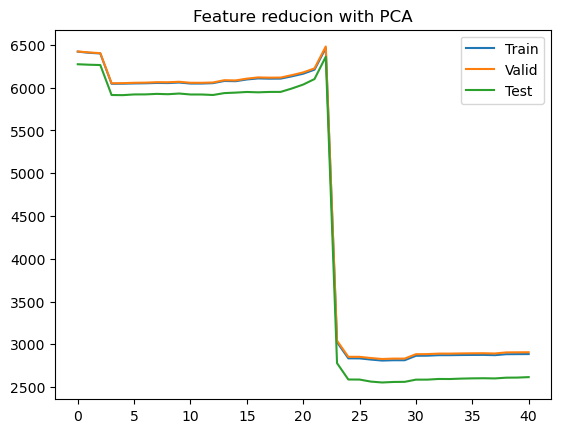

In [229]:

plt.plot(np.arange(len(em_train)), em_train, label="Train")
plt.plot(np.arange(len(em_train)), em_valid, label="Valid")
plt.plot(np.arange(len(em_train)), em_test, label="Test")

# Adding a title
plt.title("Feature reducion with PCA")

# Adding legends
plt.legend()

# Display the plot
plt.show()


In [ ]:
# Initialize PCA with desired number of components
pca = PCA(n_components=n_components)




pca_X_train_knn = pca.fit_transform(X_train_knn)
pca_X_test_knn = pca.transform(X_test_knn)
eigenvalues_knn = pca.explained_variance_


 

# Get loadings (coefficients)
loadings = pca.components_

# Assuming you have feature names (replace with your actual feature names)
 

# Associate loadings with feature names
for i in range(n_components):
    print(f"Principal Component {i + 1}:")
    for j, loading in enumerate(loadings[i]):
        print(f"  {fn[j]}: {loading:.4f}")
